# Load modules

In [104]:
import json
import matplotlib.pyplot as plt

%matplotlib inline 

# Function

### extract_data

In [5]:
def extract_data(json_file):
    with open(json_file, 'r') as f:
        d = json.load(f)
    
    ## get valid nations
    ns = []
    for i in range(len(d['Case_Number'])):
        if len( d['Case_Number'][i].strip() ) > 0:
            ns.append( d['Nationality'][i] )
    
    ns_all = set( [v.split(' ')[0].strip() for v in set(ns)] )  # first word of nation
    
    ## data to nation categories
    nation_cov = {}
    for v in ns_all:
        nation_cov[v] = []
    
    nn = 0
    for i in range(len(d['Case_Number'])):
        if len( d['Case_Number'][i].strip() ) == 0:
            print("found empty row")
        else:
            nation = d['Nationality'][i].split(' ')[0].strip()
            if nation in nation_cov:
                nation_cov[nation].append( d['Case_Number'][i] )
    return nation_cov

### draw

In [117]:
import random
import matplotlib

In [165]:
def show_stat(cov):
    n = 0
    for k,v in cov.items():
        print(k, len(v))
        n += len(v)
    print("total: ", n)

In [227]:
def draw(nation_cov, title='', angle=90, merge=False):
    plt.figure(figsize=(6,6))
    
    data = [(k,v) for k,v in nation_cov.items()]
    data.sort( key= lambda x: len(x[1]) )
    
    labels = []
    sizes = []
    explode = []
    pctdistance = []  #0.6
    labeldistance = [] #1.1
    for k,v in data:
        labels.append( '%s (%d)' % (k, len(v)) )
        sizes.append( len(v) )
        if k.strip().lower()=='china':
            explode.append(0.1)  # only "explode" the china slice 
        else:
            explode.append(0)
        
#         d = random.randrange(-10, 10) / 100. # [-0.1,0.1]
#         pctdistance.append( 0.6+d )
#         d = random.randrange(0, 10) / 100. # [-0.1,0.1]
# #         labeldistance.append( 1.05+d )
#         labeldistance.append( 1.1 )
    
    if merge:
        merged_labels = []
        merged_sizes = []
        merged_explode = []
        n = 0
        for i in range(len(sizes)):
            if sizes[i]==1:
                n += 1
            else:
                merged_labels.append( labels[i] )
                merged_sizes.append( sizes[i] )
                merged_explode.append( explode[i] )

        merged_labels.append( 'others (%d)' % n )
        merged_sizes.append( n )
        merged_explode.append( 0 )
        labels = merged_labels
        sizes = merged_sizes
        explode = merged_explode
        
    fig1, ax1 = plt.subplots( figsize=(10,10) )
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', 
            explode=explode, 
            startangle=angle,
            shadow=False)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title( title )
    plt.show()

### get_unlinked

In [294]:
def get_unlinked(json_file):
    with open(json_file, 'r') as f:
        d = json.load(f)
    
    n_unlinked_singapore = 0
    n_unlinked_others = 0
    for i in range(len(d['Exposure'])):
        v = d['Exposure'][i]
        if 'unlinked' in v.lower():
            nation = d['Nationality'][i].split(' ')[0].strip()
            if 'singapore' in nation.lower(): # local unlinked
                n_unlinked_singapore += 1
            else:
                n_unlinked_others += 1
    return n_unlinked_singapore + n_unlinked_others, n_unlinked_singapore, n_unlinked_others

In [293]:
json_file = r'/mnt/c/temp/3-19.json'
get_unlinked(json_file)

(5, 1)

In [287]:
with open(json_file, 'r') as f:
    d = json.load(f)
d.keys()

dict_keys(['Case_Number', 'Date_of_Confirmation', 'Hospital_admitted', 'Age_(years)', 'Gender', 'Nationality', 'Travel_History', 'Exposure', 'Links', 'Cluster'])

In [290]:
d['Nationality']

['Singapore Citizen',
 'British',
 'Singapore Citizen',
 'Singapore Citizen',
 'Singapore Citizen',
 'Singapore Citizen',
 'Singapore Citizen',
 'American \n(Singapore Work Pass)',
 'Singapore Citizen',
 'Singapore Citizen',
 'Singapore Citizen',
 'American',
 'Singapore Citizen',
 'Singapore Citizen',
 'Singapore Citizen',
 'Swiss',
 'Singapore Citizen',
 'Singapore Citizen',
 'Thai \n(Singapore Work Pass)',
 'British \n(Singapore Work Pass)',
 'Singapore Citizen',
 'Singapore Citizen',
 'Singapore Citizen',
 'Singapore Citizen',
 'Indian \n(Singapore Long Term \nPass)',
 'Singapore Citizen',
 'British \n(Singapore Work Pass)',
 'Singapore Permanent \nResident',
 'Singapore Citizen',
 'Malaysian \n(Singapore Work Pass)',
 'Indonesian \n(Singapore Work Pass)',
 'Singapore Citizen',
 'Singapore Citizen',
 'German \n(Singapore Work Pass)',
 'Singapore Citizen',
 'Singapore Citizen',
 'Malaysian \n(Singapore Long Term \nPass)',
 'Singapore Citizen',
 'Singapore Citizen',
 'Singapore Citiz

# April-11

In [210]:
json_file = r'/mnt/c/temp/cases.json'

In [211]:
nation_cov = extract_data(json_file)

found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row


In [212]:
n = 0
for k,v in nation_cov.items():
    print(k, len(v))
    n += len(v)
n

Malaysia 3
Indian 1
Bangladesh 99
Myanmar 4
Philippines 2
Singapore 24
China 6
UK 1
India 51


191

In [213]:
nation_cov['India'] += nation_cov['Indian']
del nation_cov['Indian']

In [338]:
2299-2109

190

In [214]:
n = 0
for k,v in nation_cov.items():
    print(k, len(v))
    n += len(v)
n

Malaysia 3
Bangladesh 99
Myanmar 4
Philippines 2
Singapore 24
China 6
UK 1
India 52


191

<Figure size 432x432 with 0 Axes>

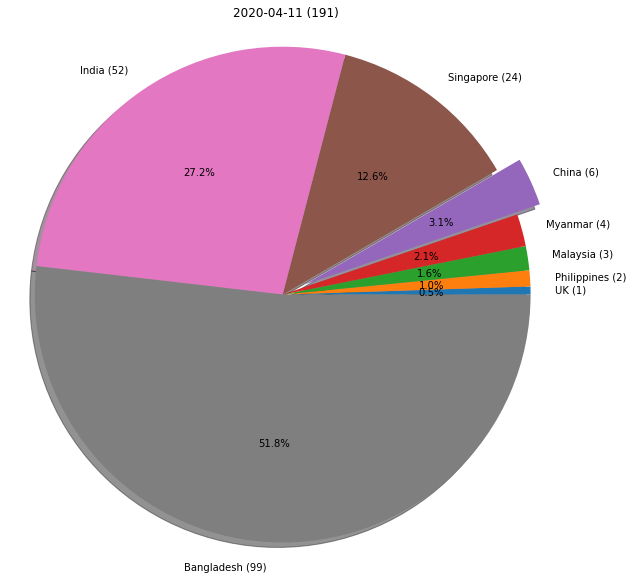

In [215]:
draw( nation_cov, angle=0, title=u'2020-04-11 (%d)' % 191 )

## April-10

In [155]:
json_file = r'/mnt/c/temp/4-10.json'
cov = extract_data(json_file)

found empty row
found empty row
found empty row
found empty row
found empty row
found empty row


In [156]:
# cov

In [157]:
n = 0
for k,v in cov.items():
    print(k, len(v))
    n += len(v)
n

Malaysia 2
Thailand 5
Bangladesh 83
Oman 1
Myanmar 2
France 1
Philippines 2
Singapore 40
Bangladeshi 2
China 5
India 49
Pending 6


198

In [158]:
## 198
cov['Bangladesh'] += cov['Bangladeshi']
del cov['Bangladeshi']

In [159]:
n = 0
for k,v in cov.items():
    print(k, len(v))
    n += len(v)
n

Malaysia 2
Thailand 5
Bangladesh 85
Oman 1
Myanmar 2
France 1
Philippines 2
Singapore 40
China 5
India 49
Pending 6


198

<Figure size 432x432 with 0 Axes>

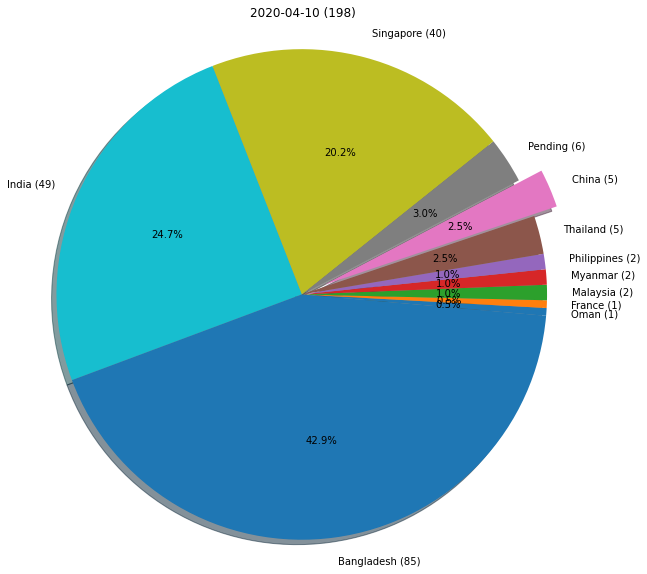

In [163]:
draw( cov, angle=-5, title=u'2020-04-10 (%d)' % 198 )

In [ ]:
## 4-9   287
4-8  142 
4-7  106
4-6-66
4-5-120
4-4-75
4-3 65
2-21


## 4-1

found empty row
Brazil 2
Malaysia 1
Australia 1
Bangladesh 10
Sri 1
Cameroon 1
Indonesia 1
Singapore 45
China 2
Switzerland 1
UK 1
India 7
total:  73


<Figure size 432x432 with 0 Axes>

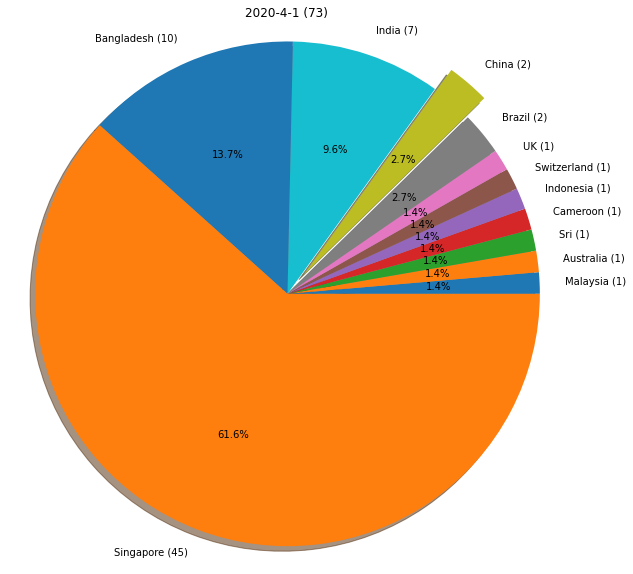

In [168]:
##
json_file = r'/mnt/c/temp/4-1.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=0, title=u'2020-4-1 (%d)' % 73 )

## 3-20

Australian 2
Malaysia 1
Sweden 1
German 1
Germany 1
Singapore 31
Netherlands 1
Indonesian 1
UK 1
total:  40


<Figure size 432x432 with 0 Axes>

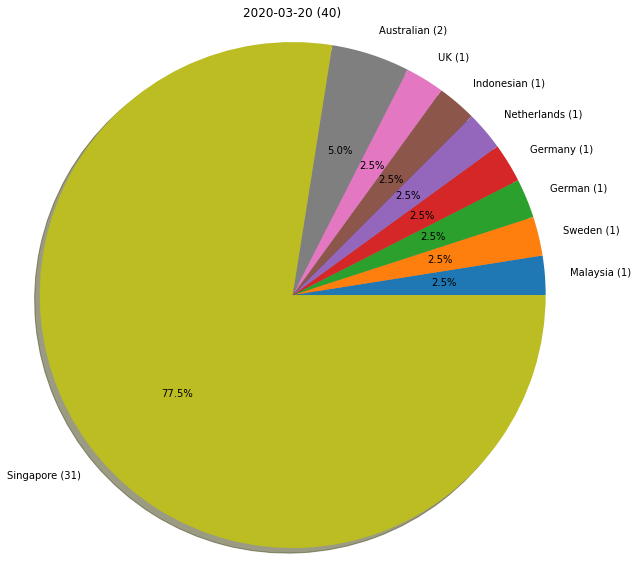

In [164]:
json_file = r'/mnt/c/temp/3-20.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=0, title=u'2020-03-20 (%d)' % 40 )

## 3-19

Brazil 1
Malaysia 1
Colombia 1
Philippines 2
Germany 1
US 1
Singapore 22
China 1
Switzerland 1
total:  31


<Figure size 432x432 with 0 Axes>

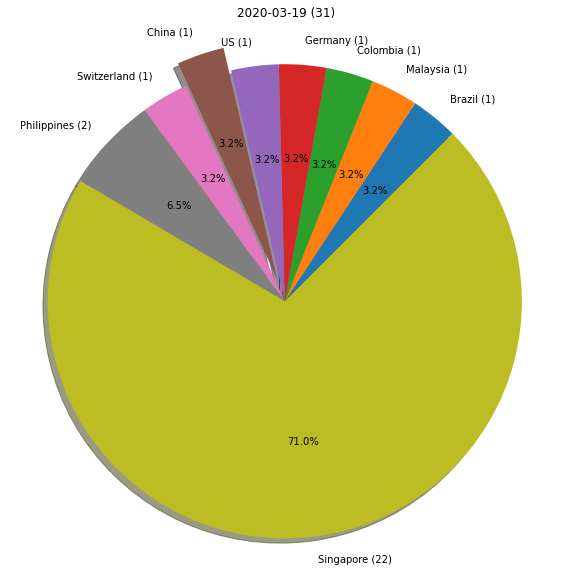

In [148]:
json_file = r'/mnt/c/temp/3-19.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=45, title=u'2020-03-19 (%d)' % 31  )

## 3-18

Indian 1
German 1
Thai 1
American 2
Swiss 1
Malaysian 2
French 1
Singapore 33
British 4
Indonesian 1
total:  47


<Figure size 432x432 with 0 Axes>

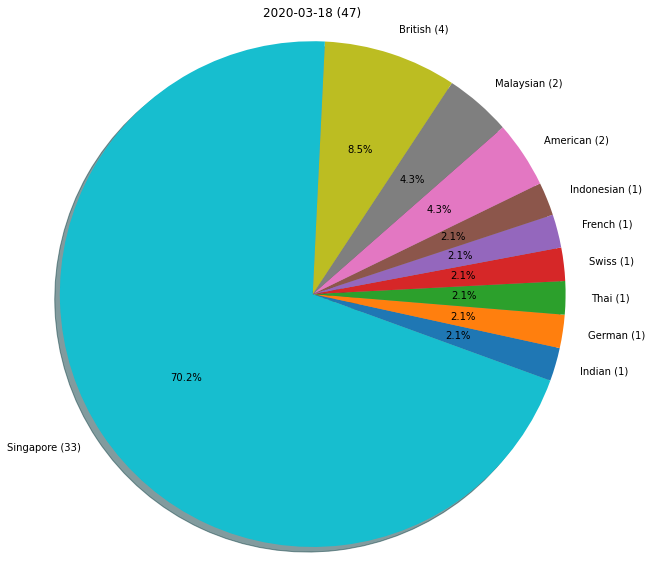

In [152]:
json_file = r'/mnt/c/temp/3-18.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=-20, title=u'2020-03-18 (%d)' % 47  )

# Nationalibty

In [325]:
China = [0, 1, 0, 2, 5, 6,
        9, 11, 11, 14, 58, 14 ]
Singapore = [33, 22, 31, 45, 40, 24,
            23, 29, 36, 30, 22, 22 ]
total = [47, 31, 40, 73, 198, 191,
        233, 386, 334, 447, 728, 623]
total_new = [47, 31, 40, 73, 198, 191,
        233, 386, 334, 447, 728, 623, 942]

In [323]:
date = ['2020/3/18', '2020/3/19', '2020/3/20', '2020/4/1', '2020/4/10', '2020/4/11',
       '2020/4/12', '2020/4/13', '2020/4/14', '2020/4/15', '2020/4/16', '2020/4/17']
date_new = ['2020/3/18', '2020/3/19', '2020/3/20', '2020/4/1', '2020/4/10', '2020/4/11',
       '2020/4/12', '2020/4/13', '2020/4/14', '2020/4/15', '2020/4/16', '2020/4/17',
            '2020/4/18']
date_names = ['3-18', '3-19', '3-20', '4-1', '4-10', '4-11', 
           '4-12', '4-13', '4-14', '4-15', '4-16', '4-17']

In [295]:
base_dir = r'/mnt/c/temp/%s.json'
unlinked_total = [get_unlinked( base_dir % date )[0] for date in date_names]
unlinked_sing = [get_unlinked( base_dir % date )[1] for date in date_names]
unlinked_other = [get_unlinked( base_dir % date )[2] for date in date_names]

### Untracked

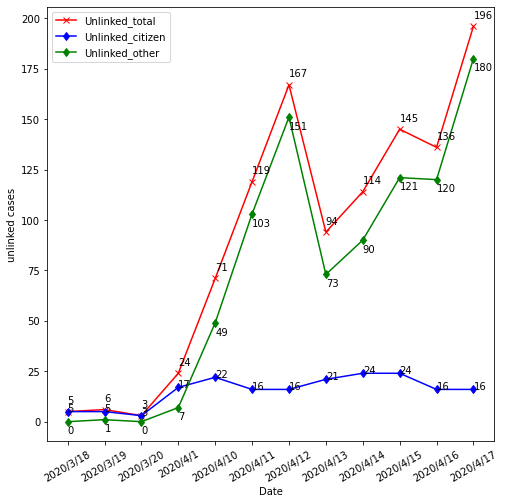

In [322]:
plt.figure(figsize=(8,8))
plt.plot(unlinked_total, '-x', color="red")
plt.plot(unlinked_sing, '-d', color="blue")
plt.plot(unlinked_other, '-d', color="green")

plt.xticks(range(len(date)), date, rotation=30)
plt.xlabel("Date")
plt.ylabel("unlinked cases")
lbs = ['Unlinked_total',
      'Unlinked_citizen', 'Unlinked_other']
plt.legend(labels = lbs, loc='upper left')

v_pos = [4, 0, -6]
data = [unlinked_total, unlinked_sing, unlinked_other]
for j in range(len(data)):
    vs = data[j]
    pos = v_pos[j]
    for i in range(len(date)):
        plt.annotate( vs[i], xy=(i,vs[i]+pos))

plt.show()

### total

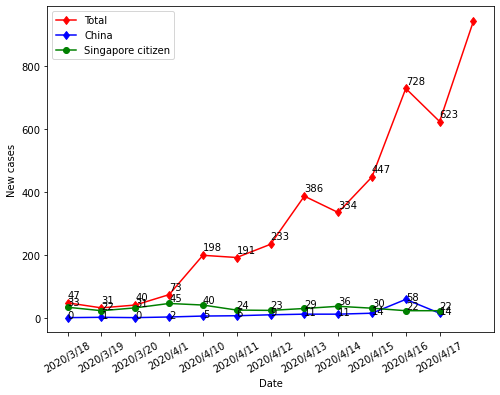

In [329]:
plt.figure(figsize=(8,6))
plt.plot(total_new, '-d', color="red")
plt.plot(China, '-d', color="blue")
plt.plot(Singapore, '-o', color="green")
plt.xticks(range(len(date)), date, rotation=30)

plt.xlabel("Date")
plt.ylabel("New cases")
plt.legend(labels = ['Total', 'China', 'Singapore citizen'], loc='upper left')

v_pos = [15, -2, 6]
data = [total_new, China, Singapore]
for j in range(len(data)):
    vs = data[j]
    pos = v_pos[j]
    for i in range(len(date)):
        plt.annotate( vs[i], xy=(i,vs[i]+pos))

plt.show()

# April 12-18

found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
Malaysia 10
Bangladesh 125
Myanmar 7
Singapore 23
China 9
India 59
total:  233


<Figure size 432x432 with 0 Axes>

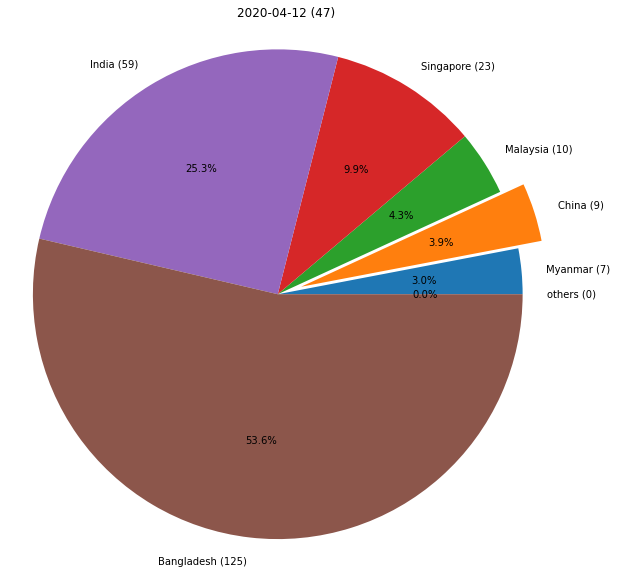

In [235]:
json_file = r'/mnt/c/temp/4-12.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=-0, title=u'2020-04-12 (%d)' % 47, merge=True  )

found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
 1
Malaysia 3
Vietnam 1
Thailand 3
Bangladesh 209
Myanmar 5
Philippines 1
Singapore 29
China 11
India 122
Pending 1
total:  386


<Figure size 432x432 with 0 Axes>

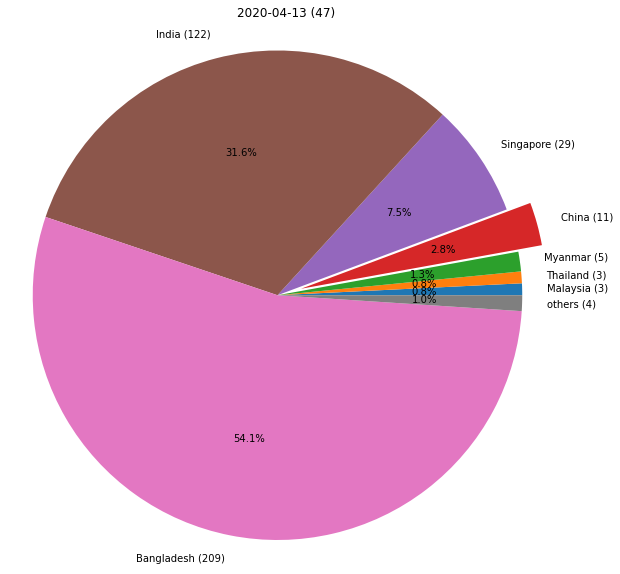

In [229]:
json_file = r'/mnt/c/temp/4-13.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=-0, title=u'2020-04-13 (%d)' % 47, merge=True  )

found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
Malaysia 3
Thailand 3
Bangladesh 172
Myanmar 4
Indonesia 2
US 1
Singapore 36
China 11
India 102
total:  334


<Figure size 432x432 with 0 Axes>

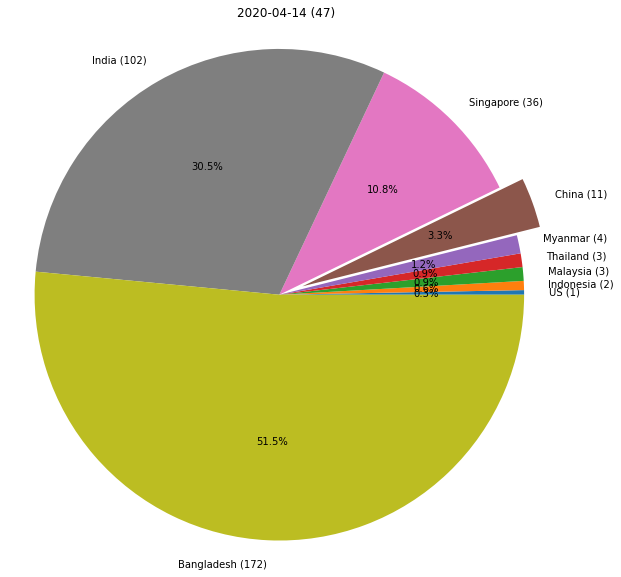

In [234]:
json_file = r'/mnt/c/temp/4-14.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=0, title=u'2020-04-14 (%d)' % 47, merge=False  )

found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
 1
Malaysia 4
Thailand 1
Bangladesh 256
Myanmar 12
Philippines 1
Singapore 30
China 14
India 128
total:  447


<Figure size 432x432 with 0 Axes>

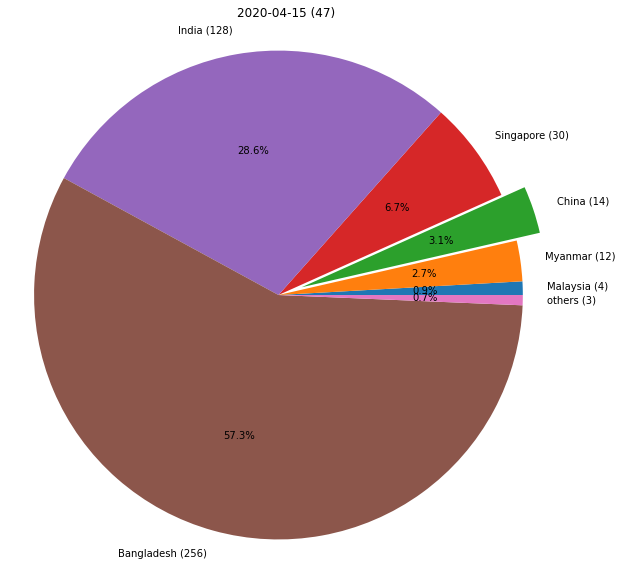

In [255]:
json_file = r'/mnt/c/temp/4-15.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=0, title=u'2020-04-15 (%d)' % 47, merge=True  )

## 16

found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
 23
Malaysia 6
Thailand 3
Bangladesh 343
Myanmar 21
W 1
Philippines 1
Singapore 22
China 58
India 226
Pending 23
total:  727


<Figure size 432x432 with 0 Axes>

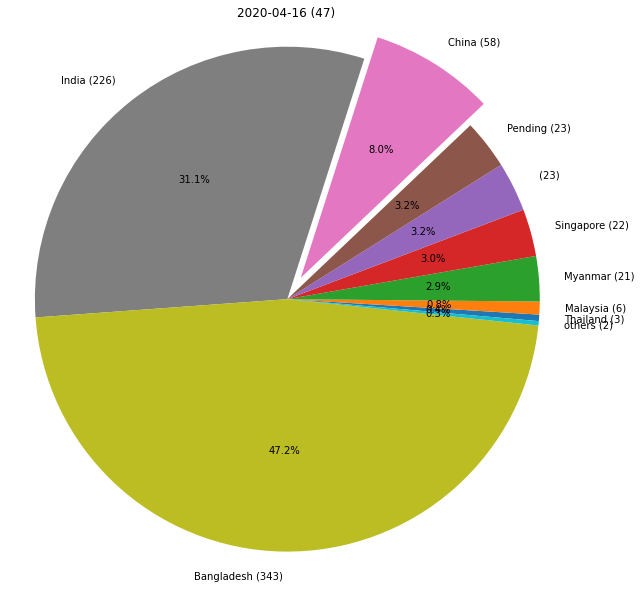

In [254]:
json_file = r'/mnt/c/temp/4-16.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=-5, title=u'2020-04-16 (%d)' % 47, merge=True  )

found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
found empty row
 1
Malaysia 11
Thailand 3
Bangladesh 376
Myanmar 15
Philippines 1
Singapore 22
China 14
India 180
total:  623


<Figure size 432x432 with 0 Axes>

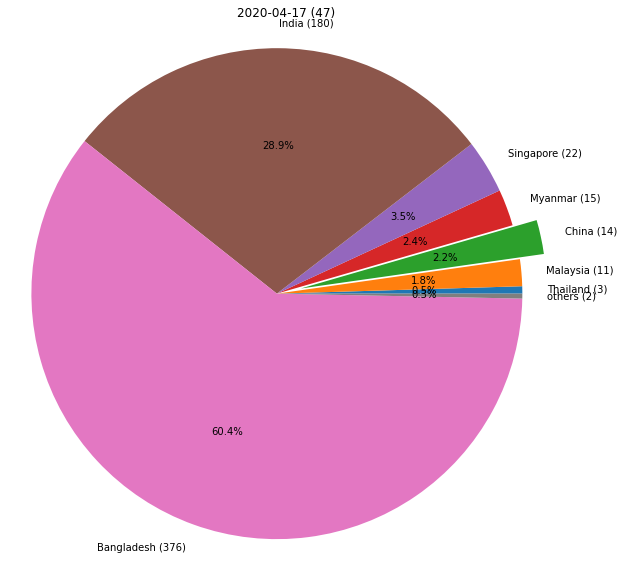

In [256]:
json_file = r'/mnt/c/temp/4-17.json'
cov = extract_data(json_file)
show_stat(cov)
draw( cov, angle=0, title=u'2020-04-17 (%d)' % 47, merge=True  )